#Proyecto Módulo 2 - Introducción al Machine Learning

###Presentado por: **Sebastian Rendón Patiño**
###**Ingeniero de Sistemas y Telecomunicaciones**
---
Conjunto de datos.
[German Credit Risk](https://www.kaggle.com/datasets/uciml/german-credit)

## **1. Introducción**
###Propósito del análisis
---
El propósito de este desarrollo consiste implementar diferentes algoritmos para el entrenamiento de un modelo de machine learning, basado en el conjunto de datos se debe implementar algoritmos supervisados para clasificación binaria, de igual forma se busca implementar algoritmos de clustering para la respectiva clasificación


###**Conjunto de Datos**



Según el origen del conjunto de datos, es la reducción de un conjunto de datos inicial que contiene información de riesgo crediticio de cierto banco alemán, según la explicación en la página se debe a que el conjunto de datos inicial contiene, ciertas columnas con símbolos que son difíciles de procesar para un proceso de análisis de datos. Sin embargo, se han seleccionado las mejores características para el proceso.



###**Contexto**

El conjunto de datos original contiene 1000 registros con 20 atributos categóricos/simbólicos preparados por el Prof. Hofmann. En este conjunto de datos, cada registro representa a una persona que toma un crédito de un banco. Cada persona se clasifica en buenos o malos riesgos crediticios según el conjunto de atributos, el conjunto de datos en sí tiene un propósito enfocado a modelos de clasificación.



###**Contenido**

Según el origen del conjunto de datos,* "Es casi imposible entender el conjunto de datos original debido a su complicado sistema de categorías y símbolos. Por lo tanto, se realizó un pequeño script de Python para convertirlo en un archivo CSV legible. Varias columnas simplemente se ignoran porque, en mi opinión, no son importantes o sus descripciones son oscuras. Los atributos seleccionados son:" *(Fuente: https://www.kaggle.com/datasets/uciml/german-credit)

Caracteristicas:
* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (text - little, moderate, rich)
* Credit amount (numeric, in DM)
* Duration (numeric, in months)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

Etiqueta
* Risk (1-good, 0-bad)

### **1.1 Instalación de Librerías**
####Librerías usadas durante el proceso



De acuerdo al contenido del curso se hará uso principalmente de líbrerias usadas a lo largo de los módulos. **Scikit Learn, Pandas, Numpy, Seaborn, y Matplotlib**

In [ ]:
# Usamos el gestor de paquetes pip para instalar 'scikit-learn'
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score

### **1.2 Preprocesamiento de datos**
####Proceso de Preparación y Procesamiento de Datos



El propósito es analizar diferentes formar de pre procesar la data de manera que se identifiquen los patrones que determinen cuáles son los mejores comportamientos al momento de entrenar los diferentes modelos. Entre los procesos contemplados están:

* Mantener el conjunto de datos tal cual esta donde la clase tiene un desbalance en proporción 70 - 30

* Realizar un proceso de OneHotEncoding para el conjunto de datos de manera que las variables categóricas se codifiquen en columnas

* Realizar un proceso de igualación de etiquetas para mantener una proporción 50 - 50 evitando el desbalance


Lectura del conjunto de datos, eliminación de la columna **"Unnamed"**, ya que no aporta valor al modelo y se crea una copia del conjunto de datos

In [ ]:
data = pd.read_csv('german_credit_data.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data_ml = data.copy()

Imputación de valores nulos para las columnas **"Saving accounts" y "Checking account"**

In [ ]:
null_sa = data_ml['Saving accounts'].isnull()
null_ca = data_ml['Checking account'].isnull()

unique_sa = data_ml['Saving accounts'].dropna().unique()
unique_ca = data_ml['Checking account'].dropna().unique()

data_ml.loc[null_sa, 'Saving accounts'] = np.random.choice(unique_sa, size=len(data_ml[null_sa]))
data_ml.loc[null_ca, 'Checking account'] = np.random.choice(unique_ca, size=len(data_ml[null_ca]))

In [ ]:
data_ml.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,rich,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Conteo de la distribución de la columna objetivo **'Risk'** para analizar la proporción

In [ ]:
data_ml['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

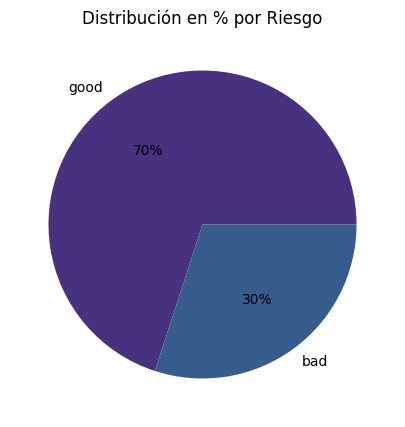

In [ ]:
#Color de paleta para uso de seaborn
colors = sns.color_palette('viridis')[0:8]
cant_risk= data_ml['Risk'].value_counts()

#Grafico de Pie
fig, (ax1) = plt.subplots(1, figsize=(10, 5))

ax1.pie(cant_risk, labels=cant_risk.index, colors = colors, autopct='%.0f%%')
ax1.set_title('Distribución en % por Riesgo')

plt.show()

Conversión de variables categóricas a númericas


In [ ]:
data_ml['Sex'] = data_ml['Sex'].astype('category').cat.codes
data_ml['Housing'] = data_ml['Housing'].astype('category').cat.codes
data_ml['Saving accounts'] = data_ml['Saving accounts'].astype('category').cat.codes
data_ml['Checking account'] = data_ml['Checking account'].astype('category').cat.codes
data_ml['Purpose'] = data_ml['Purpose'].astype('category').cat.codes
data_ml['Risk'] = data_ml['Risk'].astype('category').cat.codes

Analítica descriptiva del conjunto de datos

In [ ]:
data_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Sex,1000.0,0.690,0.462725,0.0,0.0,1.0,1.00,1.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Housing,1000.0,1.071,0.531264,0.0,1.0,1.0,1.00,2.0
Saving accounts,1000.0,0.669,1.022979,0.0,0.0,0.0,1.00,3.0
Checking account,1000.0,0.768,0.744802,0.0,0.0,1.0,1.00,2.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Purpose,1000.0,2.878,1.978138,0.0,1.0,3.0,5.00,7.0
Risk,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0


**NOTA: importante identificar que la asignación de etiquetas ha sido de la siguiente forma, para la clase Risk Good = 1 y Bad = 0**

In [ ]:
data_ml['Risk'].value_counts()

1    700
0    300
Name: Risk, dtype: int64

###**1.3 Convierto el conjunto de datos a formato X, y**
En este caso se mantiene el total de registros del conjunto de datos en la proporcion original de 70 - 30 con respecto a la clase.

In [ ]:
X = data_ml.drop(['Risk'], axis=1) # El conjunto de datos sin la variable objetivo 'Risk'.
y = data_ml['Risk']  # La columna de la variable objetivo 'Risk'.

print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


###**1.4 Convierto el conjunto de datos a formato X, y con OneHotEncoder**
En este caso se mantiene el total de registros del conjunto de datos, sin embargo se realiza el proceso de encoding  para generar las columnas adicionales de acuerdo a la cantidad de posibles opciones para cada columna

In [ ]:
X = data_ml.drop(['Risk'], axis=1) # El conjunto de datos sin la variable objetivo 'Risk'.
y = data_ml['Risk']  # La columna de la variable objetivo 'Risk'.

X_categoric = X[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].values

enc = OneHotEncoder(sparse_output=False)     # Declaramos el Transformer "OneHotEncoder".
X_categoric_onehot = enc.fit_transform(X_categoric) # Usamos "fit_transform" para obtener la matriz transformada.

print(X_categoric_onehot.shape)
print(type(X_categoric_onehot))

(1000, 24)
<class 'numpy.ndarray'>


Se realiza proceso de conversión de variables categóricas a numéricas y se establecen en columnas.

In [ ]:
# Codificar la variable categórica utilizando get_dummies
dummies = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
encoded_data = pd.get_dummies(X, columns=dummies)

# Concatenar el DataFrame original con el DataFrame codificado
encoded_data.head(5)

Imprimimos la forma del nuevo conjunto de datos

In [ ]:
X = encoded_data

print(X.shape)
print(y.shape)

###**1.5 Convierto el conjunto de datos a formato X, y, balanceado a igual número de etiquetas**
En este caso se realiza un balanceo del conjunto de datos de manera que la distribución de la clase sea de igual número, inicialmente se identificó que la distribución era 70-30 la idea es dejarla 50-50, esto inevitablemente implica eliminar ciertos registros del conjunto de datos.

In [ ]:
minority_size = data_ml['Risk'].value_counts().min()

# Submuestrear la clase mayoritaria para igualarla en tamaño a la clase minoritaria
df_balanced = pd.concat([data_ml[data_ml['Risk'] == 0].sample(n=minority_size),
                         data_ml[data_ml['Risk'] == 1].sample(n=minority_size)],
                        axis=0)

# Verificar que las clases estén balanceadas
print(df_balanced['Risk'].value_counts())

0    300
1    300
Name: Risk, dtype: int64


In [ ]:
X = df_balanced.drop(['Risk'], axis=1) # El conjunto de datos sin la variable objetivo 'Risk'.
y = df_balanced['Risk']  # La columna de la variable objetivo 'Risk'.

print(X.shape)
print(y.shape)

(600, 9)
(600,)


### 1.6 Matríz de Correlación
Se genera la matriz de correlación del conjunto de datos procesado de manera que pueda ser analizado a detalle.

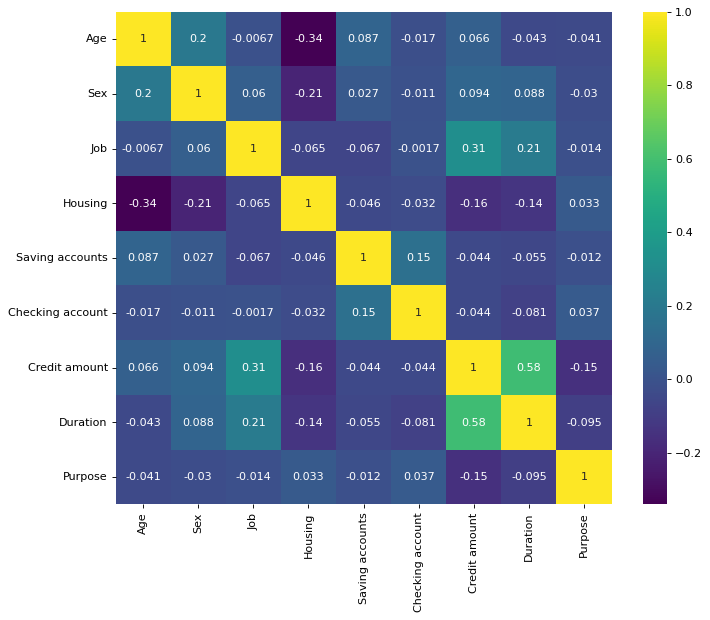

In [ ]:
corr_matrix = X.corr()
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10,8), dpi=80)
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.rc('font', size=12)

## **2. Entrenamiento de Modelos Supervisados**
---
###Propósito del proceso de entrenamiento
---
A continuación se realizara la prueba con diferentes algoritmos de entrenamiento supervisado entre los cuales se analizara cuál ofrece mejores resultados, los siguientes son los algoritmos que se entrenaran

* KNeighborsClassifier

* RandomForestClassifier

* DecisionTreeClassifier

* SVC (Support Vector Machine)

* GaussianNB

* LogisticRegression



Para cada uno de los análisis de resultados de entrenamiento se generará la gráfica de la matriz de confusión para interpretar de manera gráfica los resultados


###**2.1 KNeighborsClassifier**
KNeighborsClassifier es un algoritmo de aprendizaje supervisado utilizado para clasificación. En este algoritmo, una instancia se clasifica en función de sus vecinos más cercanos en el espacio de características. Es decir, dado un punto, se busca su posición en el espacio de características y se calcula la distancia a sus vecinos más cercanos. Luego, se asigna la etiqueta de clase más común entre esos vecinos a la instancia. El número de vecinos a considerar (K) es un parámetro que se debe especificar. KNeighborsClassifier es un método simple pero efectivo en problemas de clasificación con estructuras de datos claras y ruidosas.

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

# Crear un modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo con
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59        75
           1       0.59      0.63      0.61        75

    accuracy                           0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.60      0.60      0.60       150

___________________________________________________________________
Precisión: 0.5949
Recall:    0.6267
F_1 score: 0.6104
Accuracy: 60.00%


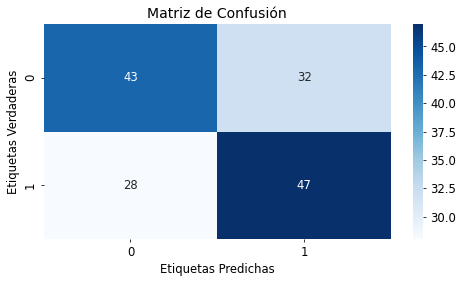

In [ ]:
#'y_test' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

###**2.2 RandomForestClassifier**
RandomForestClassifier es un algoritmo de aprendizaje supervisado utilizado para clasificación. Es una técnica de ensamblado (o conjunto) de árboles de decisión que combina la predicción de varios árboles de decisión para mejorar la generalización y la robustez del modelo. En este algoritmo, se crea un conjunto de árboles de decisión a partir de subconjuntos aleatorios de las características y las muestras de entrenamiento. Luego, la clasificación se realiza a partir de la mayoría de votos de los árboles individuales. La aleatorización de las características y las muestras de entrenamiento ayuda a evitar el sobreajuste (overfitting) y mejora el rendimiento del modelo en nuevos datos. RandomForestClassifier es un método poderoso y ampliamente utilizado para problemas de clasificación en los que se dispone de datos estructurados y no estructurados.


In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Crear un modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67        75
           1       0.67      0.57      0.62        75

    accuracy                           0.65       150
   macro avg       0.65      0.65      0.64       150
weighted avg       0.65      0.65      0.64       150

___________________________________________________________________
Precisión: 0.6719
Recall:    0.5733
F_1 score: 0.6187
Accuracy: 64.67%


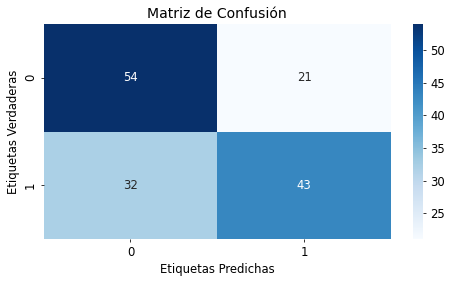

In [ ]:
#'y_test' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

###**2.3 DecisionTreeClassifier**
DecisionTreeClassifier es un algoritmo de aprendizaje supervisado utilizado para la clasificación en problemas de aprendizaje automático. Este modelo se basa en la creación de un árbol de decisiones que se utiliza para tomar decisiones de clasificación.

El algoritmo de árbol de decisión funciona mediante la división del conjunto de datos de entrada en subconjuntos más pequeños basados en los valores de las características de los datos. La división se realiza de tal manera que los subconjuntos resultantes sean cada vez más homogéneos en términos de la variable objetivo o la clase a predecir.

Para construir el árbol de decisiones, el algoritmo selecciona recursivamente la mejor característica en cada paso para dividir los datos en subconjuntos, hasta que se alcance un criterio de parada, como una profundidad máxima o un número mínimo de muestras en un nodo.

El modelo resultante puede ser utilizado para hacer predicciones sobre nuevas observaciones. Para una nueva observación, el modelo sigue el árbol de decisiones desde la raíz hasta una hoja y devuelve la clase mayoritaria de las muestras en esa hoja como la predicción.

DecisionTreeClassifier es una implementación del algoritmo de árbol de decisiones en scikit-learn. Es capaz de manejar datos categóricos y numéricos y puede manejar tanto problemas de clasificación binaria como de clasificación multiclase. Además, se pueden aplicar diferentes criterios de selección de características y criterios de división de nodos para construir el árbol de decisiones.

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Crear un modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=100)

# Entrenar el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión del modelo
print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64        75
           1       0.64      0.61      0.63        75

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.63      0.63      0.63       150

___________________________________________________________________
Precisión: 0.6389
Recall:    0.6133
F_1 score: 0.6259
Accuracy: 63.33%


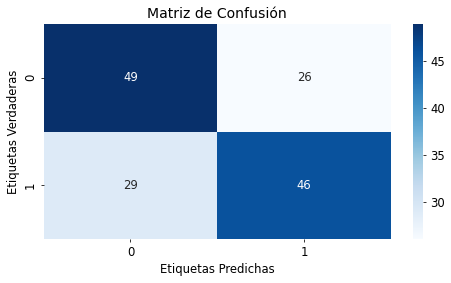

In [ ]:
#'y_test' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)


# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

###**2.4 SVM**
SVM (Support Vector Machine) es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación y regresión. En el caso de la clasificación, SVM busca encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características.

El objetivo del algoritmo SVM es encontrar un hiperplano de separación que maximice la distancia entre los puntos de datos de las diferentes clases, denominados vectores de soporte. Este hiperplano se encuentra mediante la optimización de una función de costo que minimiza el error de clasificación y maximiza la distancia entre los vectores de soporte y el hiperplano.

SVM es un algoritmo muy potente para problemas de clasificación en los que la separación entre las clases es clara. Además, puede manejar datos lineales y no lineales, gracias a la utilización de kernels que mapean los datos a un espacio de características de mayor dimensión.

Aunque SVM puede ser muy preciso en la clasificación, es sensible a la selección del kernel y a la elección de los parámetros del modelo. Además, puede ser computacionalmente costoso para grandes conjuntos de datos, ya que el tiempo de entrenamiento aumenta linealmente con el tamaño del conjunto de datos.

En resumen, SVM es una técnica de clasificación efectiva y versátil para una variedad de problemas de aprendizaje automático, que se basa en la optimización de una función de costo para encontrar el hiperplano de separación óptimo.

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100, stratify=y)

# Crear un modelo de suport vector machine
model = SVC(kernel='linear')

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos la prediccion con X_test
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64        75
           1       0.63      0.55      0.59        75

    accuracy                           0.61       150
   macro avg       0.62      0.61      0.61       150
weighted avg       0.62      0.61      0.61       150

___________________________________________________________________
Precisión: 0.6308
Recall:    0.5467
F_1 score: 0.5857
Accuracy: 61.33%


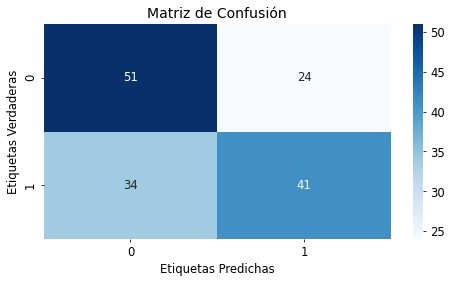

In [ ]:
#'y_true' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

###**2.5 GaussianNB**
GaussianNB es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. Es una variante del clasificador de Bayes ingenuo (Naive Bayes), que asume que todas las características de los datos son independientes entre sí y que están distribuidas normalmente (es decir, siguen una distribución gaussiana).

El algoritmo GaussianNB utiliza el teorema de Bayes para calcular la probabilidad de que un punto de datos pertenezca a cada clase, dadas sus características. Luego, el punto de datos se clasifica en la clase con la probabilidad más alta.

GaussianNB es útil para problemas de clasificación con múltiples características continuas y discretas, y es especialmente efectivo cuando el número de características es grande en comparación con el tamaño del conjunto de datos. Además, es un algoritmo rápido y eficiente en el uso de memoria, lo que lo hace adecuado para grandes conjuntos de datos.

Sin embargo, dado que GaussianNB asume que las características son independientes entre sí y siguen una distribución gaussiana, puede ser menos preciso en situaciones en las que estas suposiciones no son válidas. En general, GaussianNB es una herramienta útil para la clasificación de datos, especialmente cuando se utiliza en combinación con otros algoritmos.

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Crear el clasificador Naive Bayes
gnb = GaussianNB()

# Entrenar el modelo con el conjunto de entrenamiento
gnb.fit(X_train, y_train)

# Se predicen las etiquetas X_test
y_pred = gnb.predict(X_test)

# Evaluar la precisión del modelo
print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        75
           1       0.64      0.64      0.64        75

    accuracy                           0.64       150
   macro avg       0.64      0.64      0.64       150
weighted avg       0.64      0.64      0.64       150

___________________________________________________________________
Precisión: 0.6400
Recall:    0.6400
F_1 score: 0.6400
Accuracy: 64.00%


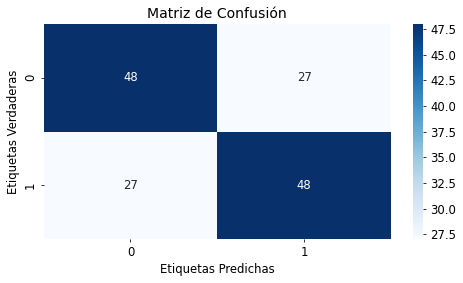

In [ ]:
#'y_true' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

###**2.6 LogisticRegression**
La regresión logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación binaria. Es un tipo de modelo lineal que utiliza una función logística para transformar una combinación lineal de características de entrada en una probabilidad de pertenencia a una de las dos clases.

La regresión logística se basa en el concepto de una función de probabilidad sigmoidal que se utiliza para predecir la probabilidad de pertenencia a la clase positiva (1) o negativa (0) de un objeto de entrada. El objetivo es ajustar los coeficientes de los términos de la función sigmoidal a los datos de entrenamiento para maximizar la probabilidad de que la función prediga correctamente la clase del objeto de entrada.

La regresión logística es útil para problemas de clasificación binaria, en los que se desea predecir la probabilidad de que un objeto de entrada pertenezca a una de las dos clases. Es particularmente útil cuando las características de entrada no tienen una distribución normal y no están relacionadas de manera lineal con la salida. Además, es un modelo relativamente sencillo que es fácil de interpretar.

Sin embargo, la regresión logística puede no funcionar bien cuando hay una interacción no lineal entre las características de entrada y la salida, o cuando hay una gran cantidad de características y una relación compleja entre ellas. En estos casos, se pueden utilizar técnicas más avanzadas como la regresión logística regularizada o modelos no lineales como las redes neuronales.

In [ ]:
# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)#solver='lbfgs'

# Crear el modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
print(classification_report(y_test, y_pred))
print('___________________________________________________________________')
print(f'Precisión: {precision_score(y_test, y_pred):.4f}')
print(f'Recall:    {recall_score(y_test, y_pred):.4f}')
print(f'F_1 score: {f1_score(y_test, y_pred):.4f}')
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61        73
           1       0.63      0.65      0.64        77

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.63      0.63      0.63       150

___________________________________________________________________
Precisión: 0.6329
Recall:    0.6494
F_1 score: 0.6410
Accuracy: 62.67%


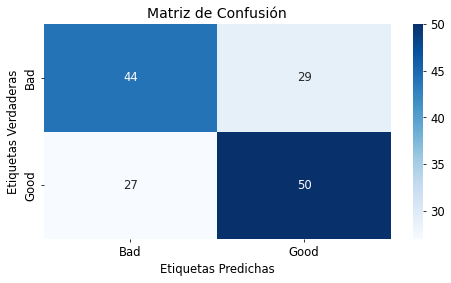

In [ ]:
#'y_true' es un array con las etiquetas verdaderas y 'y_pred' es un array con las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Creamos una grafica de la matriz con seaborn
fig, ax = plt.subplots(figsize=(8,4), dpi=70)
labels = ['Bad', 'Good']
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Agregamos detalles al gráfico
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

## **3. Evaluación general de modelos mediante** ***Metricas(precision, recall, accuracy, f1) KFold y Cross Validation***


---

Dado que evaluar modelos uno por uno para luego compararlos puede ser una tarea compleja y desgastante, esto puede simplificarse encadenando mediante ciclos el entrenamiento de cada uno de ellos e imprimir las métricas necesarias o de interés para finalmente graficar todos los resultados en una sola gráfica que de la información necesaria para elegir uno de los modelos, para el siguiente ejemplo se realiza el entrenamiento de los siguientes modelos y posterior gráfica de métricas

* KNeighborsClassifier

* RandomForestClassifier

* DecisionTreeClassifier

* SVC (Support Vector Machine)

* GaussianNB

* LogisticRegression



### 3.1 Evaluación bajo las métricas ***precision, recall, accuracy, f1***


In [ ]:
def evaluar_modelos_metrics(X, y, cv=5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
    modelos = {
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVC': SVC(),
        'GaussianNB': GaussianNB(),
        'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000)
    }

    resultados = {'Modelo': [], 'Precision': [], 'Recall': [], 'F1': [], 'Accuracy': []}

    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        resultados['Modelo'].append(nombre)
        resultados['Precision'].append(precision)
        resultados['Recall'].append(recall)
        resultados['F1'].append(f1)
        resultados['Accuracy'].append(accuracy)

    return pd.DataFrame(resultados)

In [ ]:
resultados2 = evaluar_modelos_metrics(X,y,cv=5)
resultados2

,Modelo,Precision,Recall,F1,Accuracy
0,KNeighbors,0.595238,0.555556,0.574713,0.588889
1,Random Forest,0.626506,0.577778,0.601156,0.616667
2,Decision Tree,0.662791,0.633333,0.647727,0.655556
3,SVC,0.555556,0.833333,0.666667,0.583333
4,GaussianNB,0.607843,0.688889,0.645833,0.622222
5,Logistic Regression,0.702128,0.733333,0.717391,0.711111


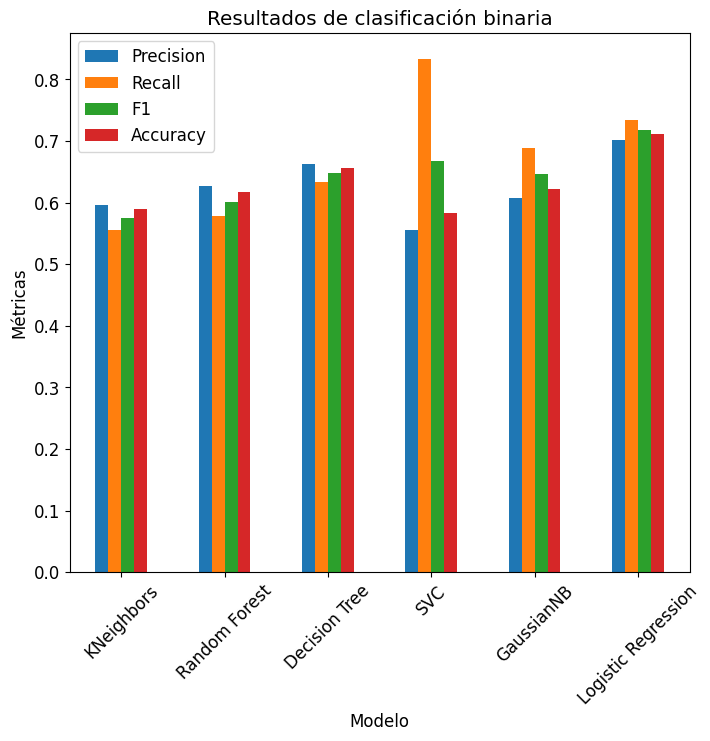

In [ ]:
ax = resultados2.plot(kind='bar', rot=45, figsize=(8, 7))

# Establecer el título y las etiquetas de los ejes
ax.set_xticklabels(resultados2['Modelo'].values.tolist())
ax.set_ylabel('Métricas')
ax.set_title('Resultados de clasificación binaria')
ax.set_xlabel('Modelo')

plt.show()


* **Precisión:** El valor de precisión es de 0.7115, lo que significa que el modelo acertó el 71.15% de las veces en las predicciones positivas. Un valor de precisión relativamente alto sugiere que el modelo tiene una buena capacidad para predecir correctamente los casos positivos.

* **Recall:** El valor de sensibilidad (recall) es de 0.8612, lo que significa que el modelo identificó correctamente el 86.12% de los casos positivos. Un valor de sensibilidad relativamente alto sugiere que el modelo tiene una buena capacidad para detectar correctamente los casos positivos.

* **F1 Score:** El valor de F1 Score es de 0.7792, lo que sugiere que el modelo tiene un buen equilibrio entre la precisión y la sensibilidad en su capacidad para clasificar correctamente los casos positivos.

* **Accuracy (Exactitud):** El valor de exactitud es de 0.66, lo que significa que el modelo acertó el 66% de las veces en todas las predicciones realizadas. Sin embargo, este valor no siempre es una buena medida de rendimiento en casos de conjuntos de datos desbalanceados.

### 3.2 Evaluación bajo la metrica ***Cross Validation***


---

Cross validation (validación cruzada) es una técnica comúnmente utilizada en machine learning para evaluar la capacidad de generalización de un modelo. Consiste en dividir el conjunto de datos de entrenamiento en múltiples subconjuntos (también conocidos como "folds"), utilizar uno de estos subconjuntos como conjunto de validación y el resto como conjunto de entrenamiento, y luego repetir este proceso para cada uno de los subconjuntos.

Existen diferentes técnicas de cross validation, siendo la más común la k-fold cross validation. En la k-fold cross validation, el conjunto de entrenamiento se divide en k subconjuntos (folds) de igual tamaño. El modelo se entrena k veces, utilizando cada uno de los k subconjuntos como conjunto de validación y el resto como conjunto de entrenamiento. Luego, se promedian las métricas de evaluación obtenidas en cada iteración para obtener una medida de la capacidad de generalización del modelo.

El uso de cross validation permite estimar el rendimiento de un modelo de manera más precisa que simplemente evaluarlo en un único conjunto de entrenamiento y prueba, ya que se utiliza todo el conjunto de datos para evaluar el rendimiento del modelo. Además, ayuda a prevenir el sobreajuste al evaluar el modelo en datos que no han sido utilizados para entrenarlo.


In [ ]:
def evaluar_modelos_cv(X, y, cv=5):
    modelos = {
        'KNeighbors': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVC': SVC(),
        'GaussianNB': GaussianNB(),
        'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000)
    }

    resultados = {'Modelo': [], 'Precision': [], 'Recall': [], 'F1': [], 'Accuracy': []}

    for nombre, modelo in modelos.items():
        precision = cross_val_score(modelo, X, y, cv=cv, scoring='precision').mean()
        recall = cross_val_score(modelo, X, y, cv=cv, scoring='recall').mean()
        f1 = cross_val_score(modelo, X, y, cv=cv, scoring='f1').mean()
        accuracy = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy').mean()

        resultados['Modelo'].append(nombre)
        resultados['Precision'].append(precision)
        resultados['Recall'].append(recall)
        resultados['F1'].append(f1)
        resultados['Accuracy'].append(accuracy)

    return pd.DataFrame(resultados)


In [ ]:
resultados_CV =evaluar_modelos_metrics(X,y,cv=5)
resultados_CV

,Modelo,Precision,Recall,F1,Accuracy
0,KNeighbors,0.595238,0.555556,0.574713,0.588889
1,Random Forest,0.650602,0.600000,0.624277,0.638889
2,Decision Tree,0.678161,0.655556,0.666667,0.672222
3,SVC,0.555556,0.833333,0.666667,0.583333
4,GaussianNB,0.607843,0.688889,0.645833,0.622222
5,Logistic Regression,0.702128,0.733333,0.717391,0.711111


Text(0, 0.5, 'Métricas')

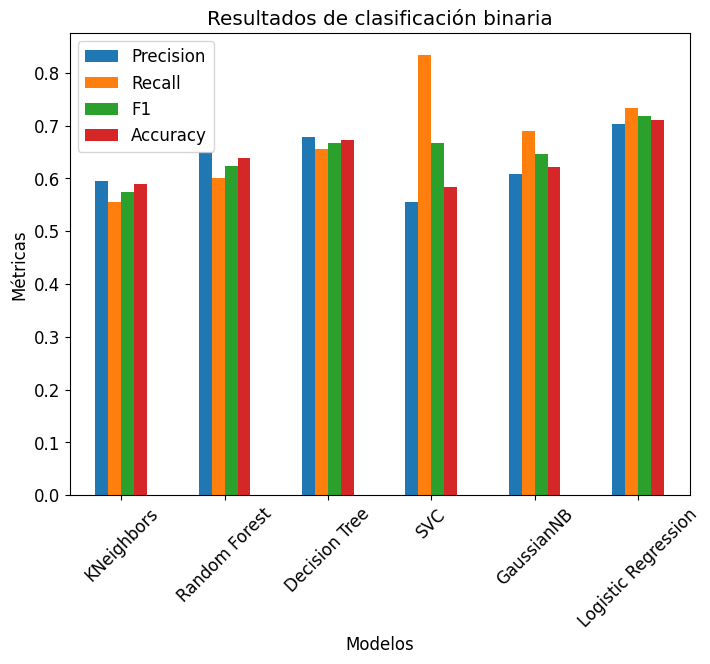

In [ ]:
ax = resultados_CV.plot(kind='bar', rot=45, figsize=(8, 6))

# Establecer el título y las etiquetas de los ejes
ax.set_title('Resultados de clasificación binaria')
ax.set_xticklabels(resultados2['Modelo'].values.tolist())
ax.set_xlabel('Modelos')
ax.set_ylabel('Métricas')

### 3.3 Evaluación bajo la metrica ***KFold***

---
K-Fold Cross Validation es una técnica utilizada en Machine Learning para evaluar el rendimiento de un modelo. Esta técnica implica dividir los datos en k subconjuntos (también llamados "folds") de igual tamaño, donde cada subconjunto se utiliza una vez como conjunto de prueba y el resto de los subconjuntos se utilizan como conjunto de entrenamiento.

Para cada subconjunto utilizado como conjunto de prueba, se entrena el modelo utilizando el resto de los subconjuntos y se evalúa su rendimiento. Se repite este proceso k veces, de modo que cada subconjunto se utiliza una vez como conjunto de prueba. El resultado final es el promedio de las métricas de evaluación obtenidas en cada iteración.

Esta técnica es útil para evaluar el rendimiento del modelo de manera más precisa que simplemente evaluándolo en un único conjunto de entrenamiento y prueba, ya que se utiliza todo el conjunto de datos para evaluar el rendimiento del modelo. Además, ayuda a prevenir el sobreajuste al evaluar el modelo en datos que no han sido utilizados para entrenarlo.


In [ ]:
def evaluar_modeloss(X, y, n_splits=5):

    # Crear el objeto KFold para la validación cruzada
    kf = KFold(n_splits=n_splits)
    modelos = {
      'KNeighbors': KNeighborsClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Decision Tree': DecisionTreeClassifier(),
      'SVC': SVC(),
      'GaussianNB': GaussianNB(),
      'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000)
    }

    # Crear un diccionario para almacenar los resultados de la evaluación
    resultados = {}

    # Iterar sobre los modelos
    for nombre_modelo, modelo in modelos.items():
        # Crear listas para almacenar los resultados de la evaluación
        precisiones = []
        exhaustividades = []
        f1_scores = []
        acuracias = []

        # Iterar sobre los pliegues de la validación cruzada
        for train_index, test_index in kf.split(X):
            # Obtener los conjuntos de entrenamiento y prueba para este pliegue
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Entrenar el modelo con los datos de entrenamiento
            modelo.fit(X_train, y_train)

            # Realizar las predicciones con los datos de prueba
            y_pred = modelo.predict(X_test)

            # Calcular las métricas de evaluación
            precision = precision_score(y_test, y_pred, zero_division=1)
            recall = recall_score(y_test, y_pred, zero_division=1)
            f1 = f1_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)

            # Agregar los resultados a las listas correspondientes
            precisiones.append(precision)
            exhaustividades.append(recall)
            f1_scores.append(f1)
            acuracias.append(accuracy)

        # Calcular las métricas promedio para el modelo
        precision_media = np.mean(precisiones)
        recall_media = np.mean(exhaustividades)
        f1_media = np.mean(f1_scores)
        accuracy_media = np.mean(acuracias)

        # Agregar los resultados del modelo al diccionario
        resultados[nombre_modelo] = {
            'precision': precision_media,
            'recall': recall_media,
            'f1': f1_media,
            'accuracy': accuracy_media
        }

    return pd.DataFrame(resultados).T

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

resultadosKF = evaluar_modeloss(X, y, n_splits=10)
resultadosKF

,precision,recall,f1,accuracy
KNeighbors,0.5,0.728333,0.313228,0.475000
Random Forest,0.5,0.788333,0.364924,0.568333
Decision Tree,0.5,0.763333,0.344771,0.560000
SVC,0.5,0.500000,0.000000,0.108333
GaussianNB,0.5,0.833333,0.399734,0.578333
Logistic Regression,0.5,0.783333,0.361216,0.558333


Text(0, 0.5, 'Métricas')

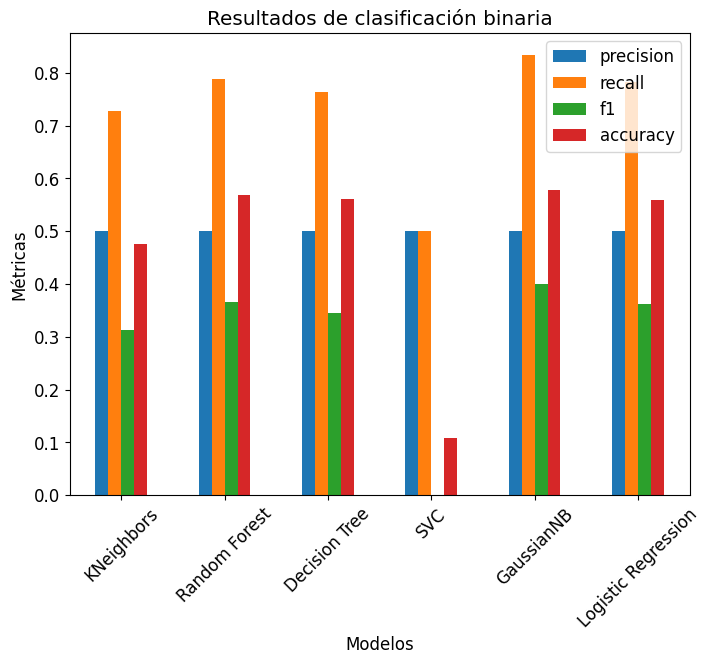

In [ ]:
ax = resultadosKF.plot(kind='bar', rot=45, figsize=(8, 6))

# Establecer el título y las etiquetas de los ejes
ax.set_title('Resultados de clasificación binaria')
ax.set_xticklabels(resultadosKF.index.tolist())
ax.set_xlabel('Modelos')
ax.set_ylabel('Métricas')

## **4. Implementación de algoritmos de aprendizaje no supervisado - Clustering**

---

Se busca por medio de un algoritmo de aprendizaje no supervisado para clustering, identificar patrones o relaciones en el conjunto de datos de manera que puedan clasificarse en este caso en 2 o más grupos, la idea principal consiste en implementar los siguientes algoritmos

* KMeans

* DBSCAN


### **4.1 K-Means**
---
K-means es un algoritmo de clustering utilizado en machine learning para agrupar un conjunto de datos en k grupos (clusters) diferentes. El algoritmo busca minimizar la distancia entre cada punto de datos y el centroide del cluster al que pertenece. En otras palabras, los puntos de datos dentro de un mismo cluster son más similares entre sí que con los puntos de datos de otros clusters.

El proceso de clustering se realiza en varias iteraciones hasta que se alcanza una solución óptima o una solución que se aproxime lo suficiente a la óptima. K-means es ampliamente utilizado en aplicaciones como análisis de mercado, segmentación de clientes, detección de anomalías y compresión de imágenes.

Es importante tener en cuenta que la elección del número de clusters (k) puede afectar significativamente la calidad de los resultados. Un valor de k demasiado bajo puede generar clusters poco representativos, mientras que un valor de k demasiado alto puede generar clusters redundantes. La elección del valor de k dependerá de la naturaleza de los datos y del objetivo específico de clustering que se esté buscando.

#### 4.1.1 Función de preprocesamiento de conjunto de datos

In [ ]:
def preprocesar_dataset():
  #Leemos el conjunto de datos
  data = pd.read_csv('german_credit_data.csv')
  data.drop('Unnamed: 0', axis=1, inplace=True)

  #convertimos variables categoricas a numericas
  data['Sex'] = data['Sex'].astype('category').cat.codes
  data['Housing'] = data['Housing'].astype('category').cat.codes
  data['Saving accounts'] = data['Saving accounts'].astype('category').cat.codes
  data['Checking account'] = data['Checking account'].astype('category').cat.codes
  data['Purpose'] = data['Purpose'].astype('category').cat.codes
  data['Risk'] = data['Risk'].astype('category').cat.codes

  #imputamos valores null
  null_sa = data['Saving accounts'].isnull()
  null_ca = data['Checking account'].isnull()

  unique_sa = data['Saving accounts'].dropna().unique()
  unique_ca = data['Checking account'].dropna().unique()

  data.loc[null_sa, 'Saving accounts'] = np.random.choice(unique_sa, size=len(data[null_sa]))
  data.loc[null_ca, 'Checking account'] = np.random.choice(unique_ca, size=len(data[null_ca]))

  #Dividimos el conjunto de datos en X, y
  X_data = data.drop(['Risk'], axis=1) # El conjunto de datos sin la variable objetivo 'Risk'.
  y_data = data['Risk']  # La columna de la variable objetivo 'Risk'.

  return X_data, y_data



Obtenemos el conjunto de datos preprocesado

In [ ]:
X, y = preprocesar_dataset()
print(X.shape)
print(y.shape)

(1000, 9)
(1000,)


Preprocesamiento de variables categóricas y numéricas aplicando el concepto de  **OneHotEncoder y StandardScaler**




In [ ]:
def preprocesar(df):
  cols_cat = df.select_dtypes(include=['object']).columns.tolist()
  cols_num = df.select_dtypes(include=['int64']).columns.tolist()
  tf = ColumnTransformer([('onehot', OneHotEncoder(), cols_cat),
                        ('scaler', StandardScaler(), cols_num)])

  X = tf.fit_transform(df)

  return X, tf

In [ ]:
X, tf = preprocesar(X)
print(X.shape)
print(tf)

(1000, 4)
ColumnTransformer(transformers=[('onehot', OneHotEncoder(), []),
                                ('scaler', StandardScaler(),
                                 ['Age', 'Job', 'Credit amount', 'Duration'])])


Obtenemos las etiquetas del conjunto de datos en formato binario

Implementación de algoritmo de Clustering Kmeans, con los siguientes Hiperparametros
* K = 2
* n_clusters = 2
* random_state = 24

In [ ]:
k = 2
model = KMeans(n_clusters= 2, random_state=42, n_init = 10)
model.fit(X)

labels = model.predict(X)
ratios = []
for i in range(model.n_clusters):
  mask = labels == i
  count = np.sum(y[mask] == 1)
  ratios.append(count / np.sum(mask))

for i, ratio in enumerate(ratios):
    print(f'Grupo: {i}, porcentaje: {ratio:.5f}')


Grupo: 0, porcentaje: 0.74708
Grupo: 1, porcentaje: 0.54148


Se implementa la evaluación de métricas por **silhouette_score**

In [ ]:
def experimento_silueta(X, K, seed = 1000):
  silhouette = []
  for k in K:
      model = KMeans(n_clusters=k, random_state=seed, n_init = 10)
      model.fit(X)
      labels = model.labels_
      s = silhouette_score(X, labels)
      silhouette.append(s)

  return silhouette

In [ ]:
K = np.arange(2, 11)
silhouette = experimento_silueta(X, K)
silhouette

[0.3610568317840908,
 0.29776924635023866,
 0.3189077092736772,
 0.27824372374601375,
 0.30677216505871285,
 0.321854335226109,
 0.2750341836448668,
 0.26607213314558,
 0.2708558103764318]

Graficamos el resultado del coeficiente de silueta

Este coeficiente mide cuán similares son los puntos dentro de un cluster en comparación con los puntos en otros clusters.

El valor del coeficiente de silhouette varía de -1 a 1, donde un valor cercano a 1 indica que los puntos dentro de un cluster son muy similares entre sí y muy diferentes a los puntos de otros clusters, mientras que un valor cercano a -1 indica lo contrario, es decir, que los puntos dentro del cluster son muy diferentes entre sí y muy similares a los puntos de otros clusters. Un valor de 0 indica que los clusters se superponen.

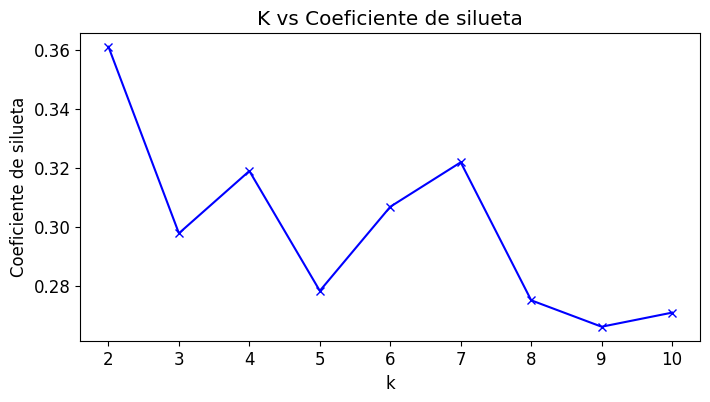

In [ ]:
plt.figure(dpi=100, figsize=(8, 4))
plt.plot(K, silhouette, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Coeficiente de silueta')
plt.title(f'K vs Coeficiente de silueta')
plt.show()

Graficamos mediante un scatterplot la distribucion de valores con respecto a Credit amount y Age, se muestra la frontera de decisión y los centroides para 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


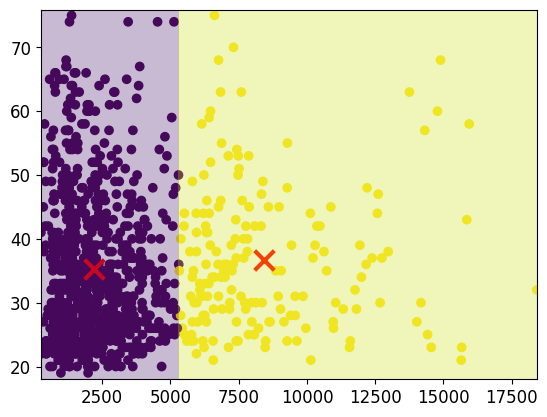

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Seleccionar solo algunas características para el modelo
X = data[["Credit amount", "Age"]]

# Entrenar el modelo K-Means con dos clusters
kmeans = KMeans(n_clusters=2, n_init = 10)
kmeans.fit(X)

# Obtener las etiquetas de los clusters para cada punto
labels = kmeans.labels_

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Crear una malla de puntos para graficar la frontera de decisión
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Obtener las etiquetas de los clusters para cada punto de la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos del conjunto de datos
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

# Graficar los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

# Graficar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.3)

# Mostrar la gráfica
plt.show()

### **4.2 DBSCAN**
---
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering que agrupa puntos cercanos en grupos (clusters) según su densidad, y puede identificar puntos que están aislados en regiones de baja densidad como ruido. En lugar de especificar el número de clusters de antemano, como en k-means, DBSCAN define los clusters como áreas contiguas de alta densidad de puntos.

La idea básica detrás de DBSCAN es que un cluster es una región densa de puntos que está rodeada por una región de baja densidad. El algoritmo comienza eligiendo un punto arbitrario y encontrando todos los puntos cercanos dentro de una distancia definida llamada "epsilon". Si hay suficientes puntos cercanos, se crea un nuevo cluster y se buscan puntos adicionales dentro de la misma distancia. Si no hay suficientes puntos cercanos, se considera que el punto es un ruido y se omite.

Luego, para cada punto en el cluster, se buscan todos los puntos cercanos dentro de la misma distancia "epsilon" y se agregan al cluster si hay suficientes puntos cercanos. Este proceso se repite hasta que se hayan explorado todos los puntos del cluster y no hay más puntos cercanos para agregar. Los puntos que no están en ningún cluster se consideran ruido.

DBSCAN tiene la ventaja de que no requiere especificar el número de clusters de antemano y puede manejar clusters de diferentes tamaños y formas. Sin embargo, el algoritmo tiene algunos hiperparámetros importantes que deben ajustarse adecuadamente, como la distancia "epsilon" y el número mínimo de puntos para formar un cluster. Además, DBSCAN puede tener dificultades para encontrar clusters en conjuntos de datos con diferentes densidades.

In [ ]:
X_DB = X.copy()

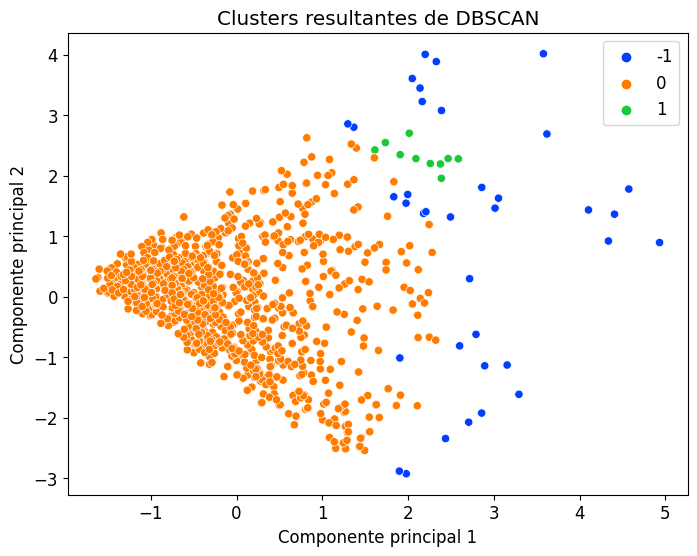

In [ ]:

# Seleccionar las características relevantes y estandarizar los datos
features = ['Credit amount','Age']
X_scan = X_DB[features].values
X_scan = (X_scan - X_scan.mean(axis=0)) / X_scan.std(axis=0)

# Aplicar PCA para reducir la dimensionalidad a 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scan)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_pca)
labels = dbscan.labels_


# Graficar los clusters resultantes
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='bright')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Clusters resultantes de DBSCAN')
plt.show()

#### 4.2.1 Índice Rand


El índice RAND (también conocido como índice de Rand ajustado) es una medida de similitud entre dos conjuntos de datos que se utiliza comúnmente en la evaluación de algoritmos de agrupamiento (clustering) o segmentación.

Este índice mide la fracción de pares de elementos en los conjuntos que se agrupan juntos o se separan en los mismos grupos en las dos particiones. El índice RAND varía entre 0 y 1, donde un valor de 0 indica que no hay similitud entre las dos particiones, mientras que un valor de 1 indica que las dos particiones son idénticas.

El índice RAND es ajustado cuando se compara con una partición aleatoria, para que su valor esperado en conjuntos de datos aleatorios sea cercano a cero. Esto significa que el índice RAND ajustado se puede utilizar para comparar diferentes algoritmos de agrupamiento o segmentación, independientemente del tamaño de los conjuntos de datos y la cantidad de grupos que se esperan en las particiones.

In [ ]:
# Graficar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=32, n_init=10)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name)

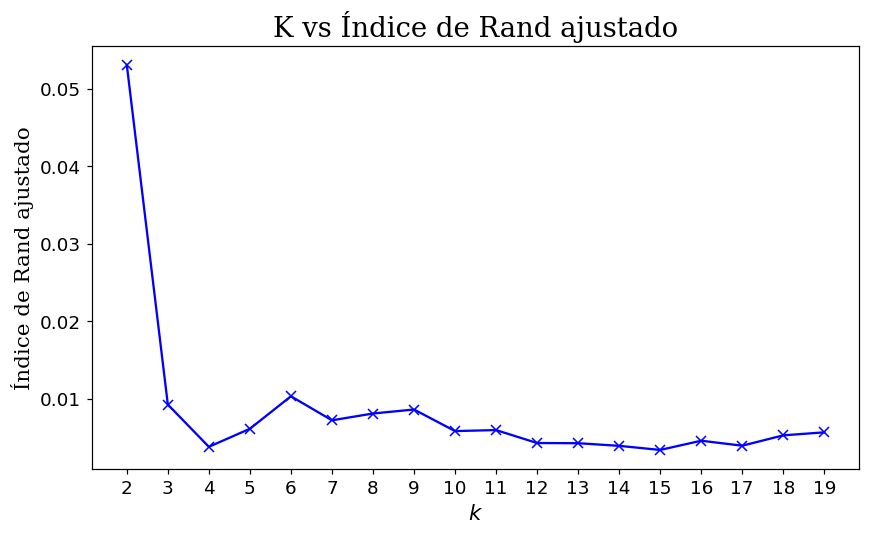

In [ ]:
from sklearn.metrics import adjusted_rand_score

plot_extern_metric(X_pca, y,
            adjusted_rand_score, 'Índice de Rand ajustado')

In [ ]:
ari = adjusted_rand_score(y, labels)

In [ ]:
ari

0.03618582442941627

## **Créditos**
---

* **Recursos consultado:**
  - [Kaggle](https://www.kaggle.com/datasets/uciml/german-credit)
  - [Medium](https://towardsdatascience.com/german-credit-data-part-1-exploratory-data-analysis-8f5f266b2426)
  - [ChatGPT](https://chat.openai.com/)
  - [Seaborn](https://seaborn.pydata.org/)
  - [Pandas](https://pandas.pydata.org/)
  - [German Credit Risk](https://rpubs.com/sid9715/580607)
  - [Scikit Learn](https://scikit-learn.org/stable/)


**Universidad Nacional de Colombia**